In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataframes by Loading CSV Files

In [2]:
df_0_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_0_shot.csv')
df_3_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_3_shot.csv')


In [3]:
df_0_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        41000 non-null  object 
 1   Benchmark prompt           41000 non-null  object 
 2   Execution time (s)         41000 non-null  object 
 3   CPU Energy (J)             41000 non-null  object 
 4   RAM Energy (J)             41000 non-null  object 
 5   GPU Energy (J)             41000 non-null  object 
 6   CPU Power (W)              41000 non-null  object 
 7   RAM Power (W)              41000 non-null  object 
 8   GPU Power (W)              41000 non-null  object 
 9   CO2 emissions (Kg)         41000 non-null  object 
 10  CO2 emissions rate (Kg/s)  41000 non-null  object 
 11  Pass@1                     41000 non-null  float64
 12  Pass@10                    41000 non-null  float64
 13  GoogleBLEU                 41000 non-null  flo

In [4]:
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40250 entries, 0 to 40249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        40250 non-null  object 
 1   Benchmark prompt           40250 non-null  object 
 2   Execution time (s)         40250 non-null  object 
 3   CPU Energy (J)             40250 non-null  object 
 4   RAM Energy (J)             40250 non-null  object 
 5   GPU Energy (J)             40250 non-null  object 
 6   CPU Power (W)              40250 non-null  object 
 7   RAM Power (W)              40250 non-null  object 
 8   GPU Power (W)              40250 non-null  object 
 9   CO2 emissions (Kg)         40250 non-null  object 
 10  CO2 emissions rate (Kg/s)  40250 non-null  object 
 11  Pass@1                     40250 non-null  float64
 12  Pass@10                    40250 non-null  float64
 13  GoogleBLEU                 40250 non-null  flo

### Remove execution/lines with "ERROR"

In [5]:
# Remove rows where at least one column contains 'Error'
df_0_shot = df_0_shot[~df_0_shot.isin(['ERROR']).any(axis=1)]
df_3_shot = df_3_shot[~df_3_shot.isin(['ERROR']).any(axis=1)]


### Cast data types

In [6]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_0_shot['LLM'] = df_0_shot['LLM'].astype(str)
df_0_shot['Benchmark prompt'] = df_0_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_0_shot[float_columns] = df_0_shot[float_columns].astype(float)
df_0_shot

,LLM,Benchmark prompt,Execution time (s),CPU Energy (J),RAM Energy (J),GPU Energy (J),CPU Power (W),RAM Power (W),GPU Power (W),CO2 emissions (Kg),CO2 emissions rate (Kg/s),Pass@1,Pass@10,GoogleBLEU,CodeBLEU,SacreBLEU
0,codegeex4-all-9b-Q6_K_L,CPP/0,132.073570,9319.037920,1545.810825,355.498284,64.913202,11.705788,2.637476,0.000731,0.000006,0.010976,0.085366,0.105386,0.221068,9.751692
1,codegeex4-all-9b-Q6_K_L,CPP/0,16.343099,1072.663639,191.258240,45.322036,64.854828,11.705788,2.695437,0.000085,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
2,codegeex4-all-9b-Q6_K_L,CPP/0,126.372966,8215.339606,1479.091709,341.446273,64.894342,11.705788,2.536212,0.000654,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
3,codegeex4-all-9b-Q6_K_L,CPP/0,126.331573,8214.154793,1478.607433,356.680285,64.886760,11.705788,2.850919,0.000655,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
4,codegeex4-all-9b-Q6_K_L,CPP/0,44.578817,2906.139294,521.768781,129.671104,64.916582,11.705788,2.838451,0.000232,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40995,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,26.423076,1728.587717,309.261063,63.663051,64.920785,11.705788,2.365661,0.000137,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577
40996,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,22.027845,1447.056963,257.810460,56.325045,64.918214,11.705788,2.670214,0.000115,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577
40997,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,102.924208,6694.642819,1204.657871,258.782207,64.912734,11.705788,2.423034,0.000532,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577
40998,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,102.954767,6700.849840,1205.014769,250.312200,64.920419,11.705788,2.322623,0.000532,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577


In [7]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_3_shot['LLM'] = df_3_shot['LLM'].astype(str)
df_3_shot['Benchmark prompt'] = df_3_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_3_shot[float_columns] = df_3_shot[float_columns].astype(float)
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38799 entries, 0 to 40249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        38799 non-null  object 
 1   Benchmark prompt           38799 non-null  object 
 2   Execution time (s)         38799 non-null  float64
 3   CPU Energy (J)             38799 non-null  float64
 4   RAM Energy (J)             38799 non-null  float64
 5   GPU Energy (J)             38799 non-null  float64
 6   CPU Power (W)              38799 non-null  float64
 7   RAM Power (W)              38799 non-null  float64
 8   GPU Power (W)              38799 non-null  float64
 9   CO2 emissions (Kg)         38799 non-null  float64
 10  CO2 emissions rate (Kg/s)  38799 non-null  float64
 11  Pass@1                     38799 non-null  float64
 12  Pass@10                    38799 non-null  float64
 13  GoogleBLEU                 38799 non-null  flo

### Calculating mean values for HumanEval-X

In [8]:
# Extract keywords from "Benchmark prompt"
df_0_shot['Programming Language'] = df_0_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df_3_shot['Programming Language'] = df_3_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')

df_0_shot['Programming Language'] = df_0_shot['Programming Language'].replace('CPP', 'C++')
df_3_shot['Programming Language'] = df_3_shot['Programming Language'].replace('CPP', 'C++')

# Print unique programming languages
print(f"df_0_shot -> {df_0_shot['Programming Language'].dropna().unique()}")
print(f"df_3_shot -> {df_3_shot['Programming Language'].dropna().unique()}")

# Check if unique programming languages are the same
if set(df_0_shot['Programming Language'].dropna().unique()) == set(df_3_shot['Programming Language'].dropna().unique()):
    print("Same languages!")
else:
    print("[WARNING] At least 1 language is not present in both dataframes")


df_0_shot -> ['C++' 'Go' 'Python' 'Java' 'JavaScript']
df_3_shot -> ['JavaScript' 'C++' 'Java' 'Python' 'Go']
Same languages!


In [9]:
# Function to remove outliers using the IQR method and return the number of removed outliers and original count
def remove_outliers_and_count(group):
    # Calculate IQR for 'CPU Energy (J)'
    Q1 = group['CPU Energy (J)'].quantile(0.25)
    Q3 = group['CPU Energy (J)'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_group = group[(group['CPU Energy (J)'] >= lower_bound) & (group['CPU Energy (J)'] <= upper_bound)]
    
    # Calculate the number of outliers removed
    num_removed = len(group) - len(filtered_group)
    
    # Return the filtered group and the number of removed outliers, as well as the original count
    return filtered_group, num_removed, len(group)

# Initialize lists to store the number of outliers removed and original counts for each subset
outliers_list_0 = []
outliers_list_3 = []

# Remove outliers and count them for df_0_shot
df_0_no_outliers_list = []
for (llm, prompt), group in df_0_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_0_no_outliers_list.append(filtered_group)
    outliers_list_0.append([llm, prompt, num_removed, original_count])  # Store original count

df_0_no_outliers = pd.concat(df_0_no_outliers_list).reset_index(drop=True)

# Remove outliers and count them for df_3_shot
df_3_no_outliers_list = []
for (llm, prompt), group in df_3_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_3_no_outliers_list.append(filtered_group)
    outliers_list_3.append([llm, prompt, num_removed, original_count])  # Store original count

df_3_no_outliers = pd.concat(df_3_no_outliers_list).reset_index(drop=True)

In [10]:
# Create DataFrames to hold the outliers list with original counts
columns = ['LLM', 'Benchmark prompt', 'Outliers removed', 'Original count']
df_outliers_0 = pd.DataFrame(outliers_list_0, columns=columns)
df_outliers_3 = pd.DataFrame(outliers_list_3, columns=columns)

# Display the results
print("Outliers removed in df_0_shot:")
df_outliers_0



Outliers removed in df_0_shot:


,LLM,Benchmark prompt,Outliers removed,Original count
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/0,0,10
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/1,0,10
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,0,10
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,0,10
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/101,0,10
...,...,...,...,...
4095,starling-lm-7b-alpha.Q5_K_S,Python/95,2,9
4096,starling-lm-7b-alpha.Q5_K_S,Python/96,2,10
4097,starling-lm-7b-alpha.Q5_K_S,Python/97,2,10
4098,starling-lm-7b-alpha.Q5_K_S,Python/98,1,10


In [11]:
print("\nOutliers removed in df_3_shot:")
df_outliers_3


Outliers removed in df_3_shot:


,LLM,Benchmark prompt,Outliers removed,Original count
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,1,8
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,0,10
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/101,0,9
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/102,2,10
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/103,0,8
...,...,...,...,...
4020,starling-lm-7b-alpha.Q5_K_S,Python/95,1,10
4021,starling-lm-7b-alpha.Q5_K_S,Python/96,1,10
4022,starling-lm-7b-alpha.Q5_K_S,Python/97,2,10
4023,starling-lm-7b-alpha.Q5_K_S,Python/98,2,9


In [12]:
# Check how many prompt_id remains in each programming language after the outliers removal

print("----------------------- 0-shot -----------------------")
print(f"Java ->  {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'C++']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")

print("----------------------- 3-shot -----------------------")
print(f"Java ->  {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'C++']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")


----------------------- 0-shot -----------------------
Java ->  164
C++ -> 164
JavaScript -> 164
Go -> 164
Python -> 164
----------------------- 3-shot -----------------------
Java ->  161
C++ -> 161
JavaScript -> 161
Go -> 161
Python -> 161


### Statistical tests

In [13]:
df_0_no_outliers['Origin'] = '0-shot'
df_3_no_outliers['Origin'] = '3-shot'

df_combined_no_outliers = pd.concat([df_0_no_outliers, df_3_no_outliers], ignore_index=True)
df_combined_no_outliers.columns


Index(['LLM', 'Benchmark prompt', 'Execution time (s)', 'CPU Energy (J)',
       'RAM Energy (J)', 'GPU Energy (J)', 'CPU Power (W)', 'RAM Power (W)',
       'GPU Power (W)', 'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)',
       'Pass@1', 'Pass@10', 'GoogleBLEU', 'CodeBLEU', 'SacreBLEU',
       'Programming Language', 'Origin'],
      dtype='object')

#### By benchmark prompt

In [14]:
import pandas as pd
from scipy.stats import shapiro

# Inicializar listas para armazenar os resultados
results = []

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, prompt, prompt_type), group in df_combined_no_outliers.groupby(['LLM', 'Benchmark prompt', 'Origin']):
    stat, p_value = shapiro(group['CPU Energy (J)'])  # Teste de Shapiro-Wilk
    is_normal = 'Normal' if p_value > 0.05 else 'Not Normal'  # Verificar normalidade
    results.append([llm, prompt, stat, p_value, is_normal, prompt_type])

# Criar um DataFrame com os resultados
shapiro_results = pd.DataFrame(results, columns=['LLM', 'Benchmark prompt', 'Statistic', 'p-value', 'Normality', 'Prompt Type'])

# Exibir os resultados
shapiro_results


,LLM,Benchmark prompt,Statistic,p-value,Normality,Prompt Type
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/0,0.867647,0.093839,Normal,0-shot
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/1,0.724957,0.001769,Not Normal,0-shot
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,0.941056,0.564821,Normal,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,0.760831,0.016442,Not Normal,3-shot
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,0.767096,0.005765,Not Normal,0-shot
...,...,...,...,...,...,...
8120,starling-lm-7b-alpha.Q5_K_S,Python/97,0.854493,0.105758,Normal,3-shot
8121,starling-lm-7b-alpha.Q5_K_S,Python/98,0.952422,0.716651,Normal,0-shot
8122,starling-lm-7b-alpha.Q5_K_S,Python/98,0.960490,0.822928,Normal,3-shot
8123,starling-lm-7b-alpha.Q5_K_S,Python/99,0.824580,0.038811,Not Normal,0-shot


In [15]:
shapiro_results.groupby(['LLM', 'Prompt Type', 'Normality']).size().unstack(fill_value=0)

Normality                                        Normal  Not Normal
LLM                                 Prompt Type                    
Meta-Llama-3-8B-Instruct-Q6_K       0-shot          553         267
                                    3-shot          466         339
codegeex4-all-9b-Q6_K_L             0-shot          512         308
                                    3-shot          386         419
codellama-7b-instruct.Q5_K_M        0-shot          498         322
                                    3-shot          642         163
deepseek-coder-6.7b-instruct.Q5_K_M 0-shot          399         421
                                    3-shot          577         228
starling-lm-7b-alpha.Q5_K_S         0-shot          646         174
                                    3-shot          605         200

In [16]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, wilcoxon

# Inicializar listas para armazenar os resultados
t_test_results = []

# Definir o nível de significância
alpha = 0.05

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, prompt), group in df_combined_no_outliers.groupby(['LLM', 'Benchmark prompt']):
    # Separar as amostras de 0-shot e 3-shot
    group_0 = group[group['Origin'] == '0-shot']['CPU Energy (J)']
    group_3 = group[group['Origin'] == '3-shot']['CPU Energy (J)']
    
    # Verificar se ambas as amostras têm pelo menos 3 elementos
    if len(group_0) < 3 or len(group_3) < 3:
        continue  # Pular se qualquer grupo tiver menos de 3 amostras

    # Teste de normalidade para 0-shot
    stat_0, p_value_0 = shapiro(group_0)
    is_normal_0 = p_value_0 > 0.05

    # Teste de normalidade para 3-shot
    stat_3, p_value_3 = shapiro(group_3)
    is_normal_3 = p_value_3 > 0.05

    # Aplicar os testes apropriados
    if is_normal_0 and is_normal_3:
        # Ambos são normais, usar t-test
        stat, p_value = ttest_ind(group_0, group_3)
        test_type = 't-test'
    else:
        # Pelo menos um não é normal, usar Wilcoxon
        if len(group_0) == len(group_3):
            stat, p_value = wilcoxon(group_0, group_3)
            test_type = 'Wilcoxon'
        else:
            # Se os tamanhos das amostras forem diferentes, não podemos aplicar Wilcoxon
            continue

    # Verificar se é estatisticamente significativo
    is_significant = 'Significant' if p_value < alpha else 'Not Significant'

    # Armazenar os resultados com a coluna Origin
    t_test_results.append([llm, prompt, test_type, stat, p_value, is_significant, '0-shot'])
    t_test_results.append([llm, prompt, test_type, stat, p_value, is_significant, '3-shot'])

# Criar um DataFrame com os resultados
test_results_df = pd.DataFrame(t_test_results, columns=['LLM', 'Benchmark prompt', 'Test Type', 'Statistic', 'p-value', 'Significance', 'Origin'])

# Exibir os resultados
test_results_df

,LLM,Benchmark prompt,Test Type,Statistic,p-value,Significance,Origin
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,Wilcoxon,22.000000,6.250000e-01,Not Significant,0-shot
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,Wilcoxon,22.000000,6.250000e-01,Not Significant,3-shot
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/105,Wilcoxon,25.000000,8.457031e-01,Not Significant,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/105,Wilcoxon,25.000000,8.457031e-01,Not Significant,3-shot
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/107,t-test,3.365425,3.937115e-03,Significant,0-shot
...,...,...,...,...,...,...,...
4519,starling-lm-7b-alpha.Q5_K_S,Python/95,t-test,68.909976,3.978174e-19,Significant,3-shot
4520,starling-lm-7b-alpha.Q5_K_S,Python/97,t-test,7562.850743,1.102619e-47,Significant,0-shot
4521,starling-lm-7b-alpha.Q5_K_S,Python/97,t-test,7562.850743,1.102619e-47,Significant,3-shot
4522,starling-lm-7b-alpha.Q5_K_S,Python/98,t-test,319.803205,1.884838e-28,Significant,0-shot


#### By programming language

In [17]:
import pandas as pd
from scipy.stats import shapiro

# Inicializar listas para armazenar os resultados
results = []

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, prompt, origin), group in df_combined_no_outliers.groupby(['LLM', 'Programming Language', 'Origin']):
    # Teste de Shapiro-Wilk para CPU Energy
    stat_energy, p_value_energy = shapiro(group['CPU Energy (J)'])  # Teste de Shapiro-Wilk
    is_normal_energy = 'Normal' if p_value_energy > 0.05 else 'Not Normal'  # Verificar normalidade

    # Teste de Shapiro-Wilk para Execution Time
    stat_time, p_value_time = shapiro(group['Execution time (s)'])  # Teste de Shapiro-Wilk
    is_normal_time = 'Normal' if p_value_time > 0.05 else 'Not Normal'  # Verificar normalidade

    # Armazenar os resultados para CPU Energy
    results.append([llm, prompt, stat_energy, p_value_energy, is_normal_energy, origin, 'CPU Energy'])
    # Armazenar os resultados para Execution Time
    results.append([llm, prompt, stat_time, p_value_time, is_normal_time, origin, 'Execution Time'])

# Criar um DataFrame com os resultados
shapiro_results = pd.DataFrame(results, columns=['LLM', 'Programming Language', 'Statistic', 'p-value', 'Normality', 'Origin', 'Measurement Type'])

# Exibir os resultados
shapiro_results


,LLM,Programming Language,Statistic,p-value,Normality,Origin,Measurement Type
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.826463,3.928146e-38,Not Normal,0-shot,CPU Energy
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.824347,2.644841e-38,Not Normal,0-shot,Execution Time
2,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.764561,5.528907e-40,Not Normal,3-shot,CPU Energy
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.762917,4.387760e-40,Not Normal,3-shot,Execution Time
4,Meta-Llama-3-8B-Instruct-Q6_K,Go,0.959258,5.524853e-20,Not Normal,0-shot,CPU Energy
...,...,...,...,...,...,...,...
95,starling-lm-7b-alpha.Q5_K_S,JavaScript,0.816116,1.061015e-37,Not Normal,3-shot,Execution Time
96,starling-lm-7b-alpha.Q5_K_S,Python,0.206179,0.000000e+00,Not Normal,0-shot,CPU Energy
97,starling-lm-7b-alpha.Q5_K_S,Python,0.200656,0.000000e+00,Not Normal,0-shot,Execution Time
98,starling-lm-7b-alpha.Q5_K_S,Python,0.737687,1.457350e-42,Not Normal,3-shot,CPU Energy


In [18]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Inicializar listas para armazenar os resultados
t_test_results = []

# Definir o nível de significância
alpha = 0.05

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, programming_language), group in df_combined_no_outliers.groupby(['LLM', 'Programming Language']):
    # Separar as amostras de 0-shot e 3-shot para CPU Energy
    group_0_energy = group[group['Origin'] == '0-shot']['CPU Energy (J)']
    group_3_energy = group[group['Origin'] == '3-shot']['CPU Energy (J)']
    
    # Separar as amostras de 0-shot e 3-shot para Execution Time
    group_0_time = group[group['Origin'] == '0-shot']['Execution time (s)']
    group_3_time = group[group['Origin'] == '3-shot']['Execution time (s)']
    
    # Teste para CPU Energy
    if len(group_0_energy) < 1 or len(group_3_energy) < 1:
        continue  # Pular se qualquer grupo não tiver amostras

    # Teste de normalidade para CPU Energy
    is_normal_0_energy = shapiro(group_0_energy)[1] > 0.05
    is_normal_3_energy = shapiro(group_3_energy)[1] > 0.05

    # Aplicar os testes apropriados para CPU Energy
    if is_normal_0_energy and is_normal_3_energy:
        # Ambos são normais, usar t-test
        stat_energy, p_value_energy = ttest_ind(group_0_energy, group_3_energy, equal_var=False)
        test_type_energy = 't-test'
    else:
        # Pelo menos um não é normal, usar Mann-Whitney U test
        stat_energy, p_value_energy = mannwhitneyu(group_0_energy, group_3_energy)
        test_type_energy = 'Mann-Whitney U'

    # Verificar se é estatisticamente significativo para CPU Energy
    is_significant_energy = 'Significant' if p_value_energy < alpha else 'Not Significant'

    # Armazenar os resultados de CPU Energy
    t_test_results.append([llm, programming_language, 'CPU Energy', test_type_energy, stat_energy, p_value_energy, is_significant_energy, '0-shot'])
    t_test_results.append([llm, programming_language, 'CPU Energy', test_type_energy, stat_energy, p_value_energy, is_significant_energy, '3-shot'])

    # Teste para Execution Time
    if len(group_0_time) < 1 or len(group_3_time) < 1:
        continue  # Pular se qualquer grupo não tiver amostras

    # Teste de normalidade para Execution Time
    is_normal_0_time = shapiro(group_0_time)[1] > 0.05
    is_normal_3_time = shapiro(group_3_time)[1] > 0.05

    # Aplicar os testes apropriados para Execution Time
    if is_normal_0_time and is_normal_3_time:
        # Ambos são normais, usar t-test
        stat_time, p_value_time = ttest_ind(group_0_time, group_3_time, equal_var=False)
        test_type_time = 't-test'
    else:
        # Pelo menos um não é normal, usar Mann-Whitney U test
        stat_time, p_value_time = mannwhitneyu(group_0_time, group_3_time)
        test_type_time = 'Mann-Whitney U'

    # Verificar se é estatisticamente significativo para Execution Time
    is_significant_time = 'Significant' if p_value_time < alpha else 'Not Significant'

    # Armazenar os resultados de Execution Time
    t_test_results.append([llm, programming_language, 'Execution Time', test_type_time, stat_time, p_value_time, is_significant_time, '0-shot'])
    t_test_results.append([llm, programming_language, 'Execution Time', test_type_time, stat_time, p_value_time, is_significant_time, '3-shot'])

# Criar um DataFrame com os resultados
test_results_df = pd.DataFrame(t_test_results, columns=['LLM', 'Programming Language', 'Measurement Type', 'Test Type', 'Statistic', 'p-value', 'Significance', 'Origin'])

# Exibir os resultados
test_results_df

,LLM,Programming Language,Measurement Type,Test Type,Statistic,p-value,Significance,Origin
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,CPU Energy,Mann-Whitney U,1524345.0,1.823849e-103,Significant,0-shot
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,CPU Energy,Mann-Whitney U,1524345.0,1.823849e-103,Significant,3-shot
2,Meta-Llama-3-8B-Instruct-Q6_K,C++,Execution Time,Mann-Whitney U,1531862.0,1.209831e-106,Significant,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,Execution Time,Mann-Whitney U,1531862.0,1.209831e-106,Significant,3-shot
4,Meta-Llama-3-8B-Instruct-Q6_K,Go,CPU Energy,Mann-Whitney U,1966507.0,0.000000e+00,Significant,0-shot
...,...,...,...,...,...,...,...,...
95,starling-lm-7b-alpha.Q5_K_S,JavaScript,Execution Time,Mann-Whitney U,1883857.0,0.000000e+00,Significant,3-shot
96,starling-lm-7b-alpha.Q5_K_S,Python,CPU Energy,Mann-Whitney U,1800284.0,0.000000e+00,Significant,0-shot
97,starling-lm-7b-alpha.Q5_K_S,Python,CPU Energy,Mann-Whitney U,1800284.0,0.000000e+00,Significant,3-shot
98,starling-lm-7b-alpha.Q5_K_S,Python,Execution Time,Mann-Whitney U,1800243.0,0.000000e+00,Significant,0-shot


In [19]:
test_results_df_stat = test_results_df.groupby(
    ['LLM', 'Programming Language', 'Origin', 'Measurement Type', 'Significance']
).size().unstack(fill_value=0)
test_results_df_stat

Significance                                                                Significant
LLM                           Programming Language Origin Measurement Type             
Meta-Llama-3-8B-Instruct-Q6_K C++                  0-shot CPU Energy                  1
                                                          Execution Time              1
                                                   3-shot CPU Energy                  1
                                                          Execution Time              1
                              Go                   0-shot CPU Energy                  1
...                                                                                 ...
starling-lm-7b-alpha.Q5_K_S   JavaScript           3-shot Execution Time              1
                              Python               0-shot CPU Energy                  1
                                                          Execution Time              1
                                                   3-shot CPU Energy                  1
                                                          Execution Time              1

[100 rows x 1 columns]

##### Count significant samples by LLM

In [20]:
test_results_df_stat.loc["codegeex4-all-9b-Q6_K_L"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [21]:
test_results_df_stat.loc["codellama-7b-instruct.Q5_K_M"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [22]:
test_results_df_stat.loc["deepseek-coder-6.7b-instruct.Q5_K_M"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [23]:
test_results_df_stat.loc["Meta-Llama-3-8B-Instruct-Q6_K"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [24]:
test_results_df_stat.loc["starling-lm-7b-alpha.Q5_K_S"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

### Create dataframes with all the average values

In [25]:
# List of columns to calculate the mean for
columns_to_average = ['CPU Energy (J)', 'Execution time (s)', 'Pass@1', 'Pass@10', 'CodeBLEU', 'SacreBLEU', 'GoogleBLEU']

# Grouping by LLM and Programming Language, and calculating the mean for the specified columns
df_0_averages = df_0_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()
df_3_averages = df_3_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()

df_0_averages["SacreBLEU"] = df_0_averages["SacreBLEU"] / 100
df_3_averages["SacreBLEU"] = df_3_averages["SacreBLEU"] / 100

df_0_averages

,LLM,Programming Language,CPU Energy (J),Execution time (s),Pass@1,Pass@10,CodeBLEU,SacreBLEU,GoogleBLEU
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,4693.721286,72.015208,0.026220,0.195122,0.256971,0.115135,0.123414
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,4698.558512,71.839334,0.007317,0.048780,0.315362,0.086511,0.098010
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,3966.940303,60.832711,0.035976,0.170732,0.345221,0.133636,0.140678
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,3918.714984,60.042486,0.001220,0.012195,0.202326,0.071373,0.085230
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,4863.420492,74.589706,0.479878,0.768293,0.286537,0.048214,0.056134
5,codegeex4-all-9b-Q6_K_L,C++,6068.573732,93.225928,0.010976,0.085366,0.221068,0.097517,0.105386
6,codegeex4-all-9b-Q6_K_L,Go,2668.078154,40.819007,0.000610,0.004653,0.325416,0.198654,0.205870
7,codegeex4-all-9b-Q6_K_L,Java,2710.385556,41.234427,0.000000,0.000000,0.340050,0.234309,0.242605
8,codegeex4-all-9b-Q6_K_L,JavaScript,2030.780191,31.047071,0.000610,0.006098,0.216770,0.186302,0.191231
9,codegeex4-all-9b-Q6_K_L,Python,2484.937894,37.960676,0.700610,0.914634,0.297576,0.119884,0.133790


### Plots

#### Compare CPU Energy for all LLMs (0-shot and 3-shot)

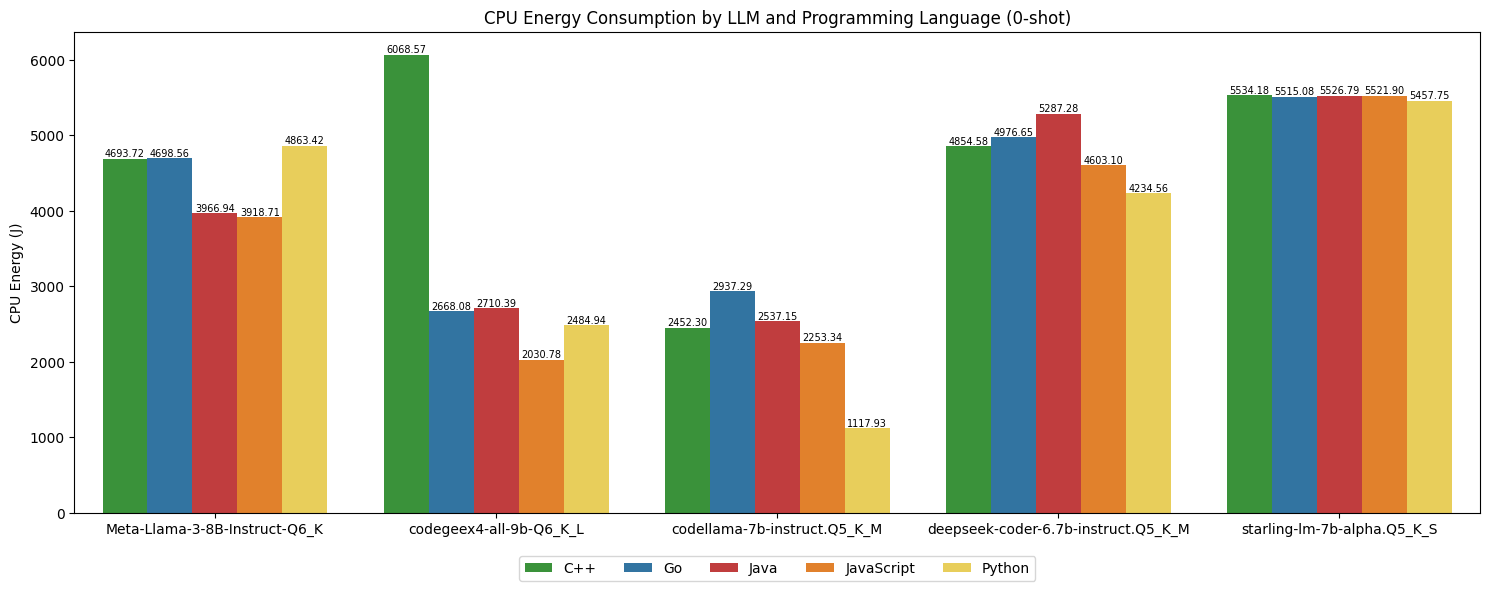

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='CPU Energy (J)', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('CPU Energy Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=7)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


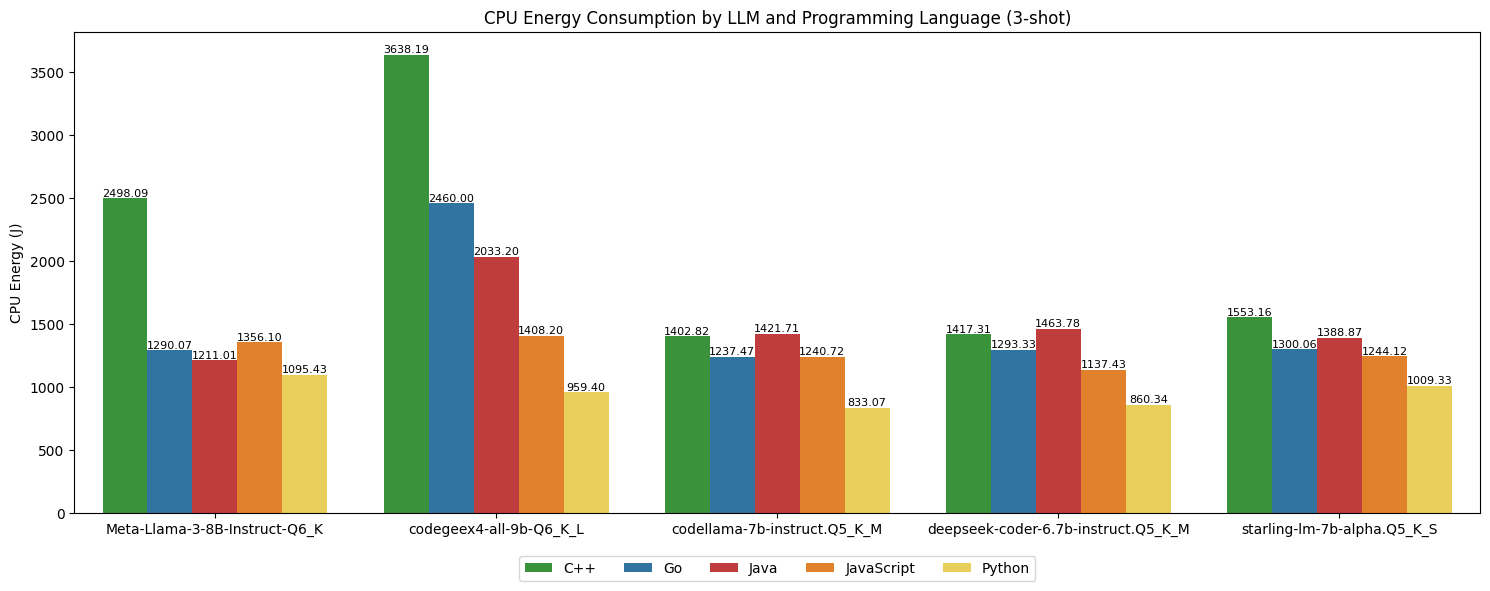

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='CPU Energy (J)', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('CPU Energy Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=8)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


#### Compare Execution time for all LLMs (0-shot and 3-shot)

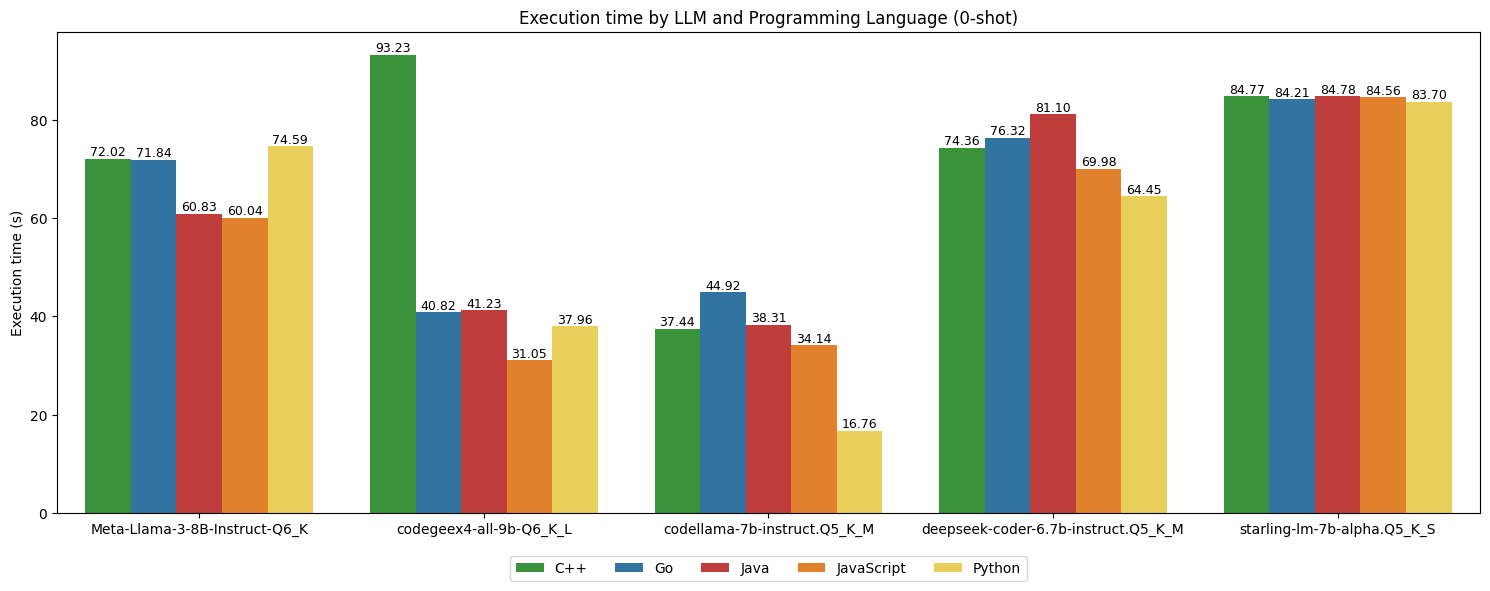

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma paleta de cores para as linguagens de programação
palette = {
    'Go': '#1f77b4',        # Azul
    'Python': '#ffdd44',    # Amarelo
    'Java': '#d62728',      # Vermelho
    'JavaScript': '#ff7f0e', # Laranja
    'C++': '#2ca02c'        # Verde
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Criar o barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, x='LLM', y='Execution time (s)', hue='Programming Language', palette=palette,
                      hue_order=programming_languages_order)

# Adicionar títulos e rótulos
plt.title('Execution time by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('Execution time (s)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

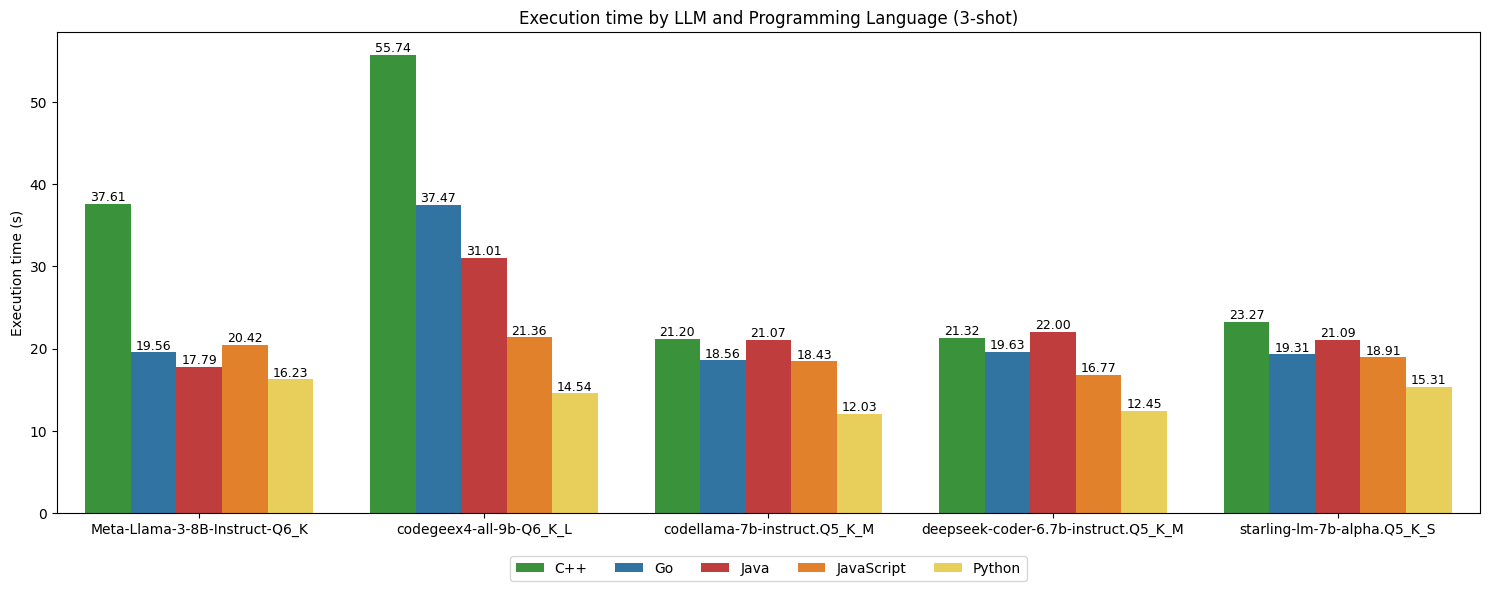

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma paleta de cores para as linguagens de programação
palette = {
    'Go': '#1f77b4',        # Azul
    'Python': '#ffdd44',    # Amarelo
    'Java': '#d62728',      # Vermelho
    'JavaScript': '#ff7f0e', # Laranja
    'C++': '#2ca02c'        # Verde
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Criar o barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, x='LLM', y='Execution time (s)', hue='Programming Language', palette=palette,
                      hue_order=programming_languages_order)

# Adicionar títulos e rótulos
plt.title('Execution time by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('Execution time (s)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

#### Differences from 0-shot to 3-shot

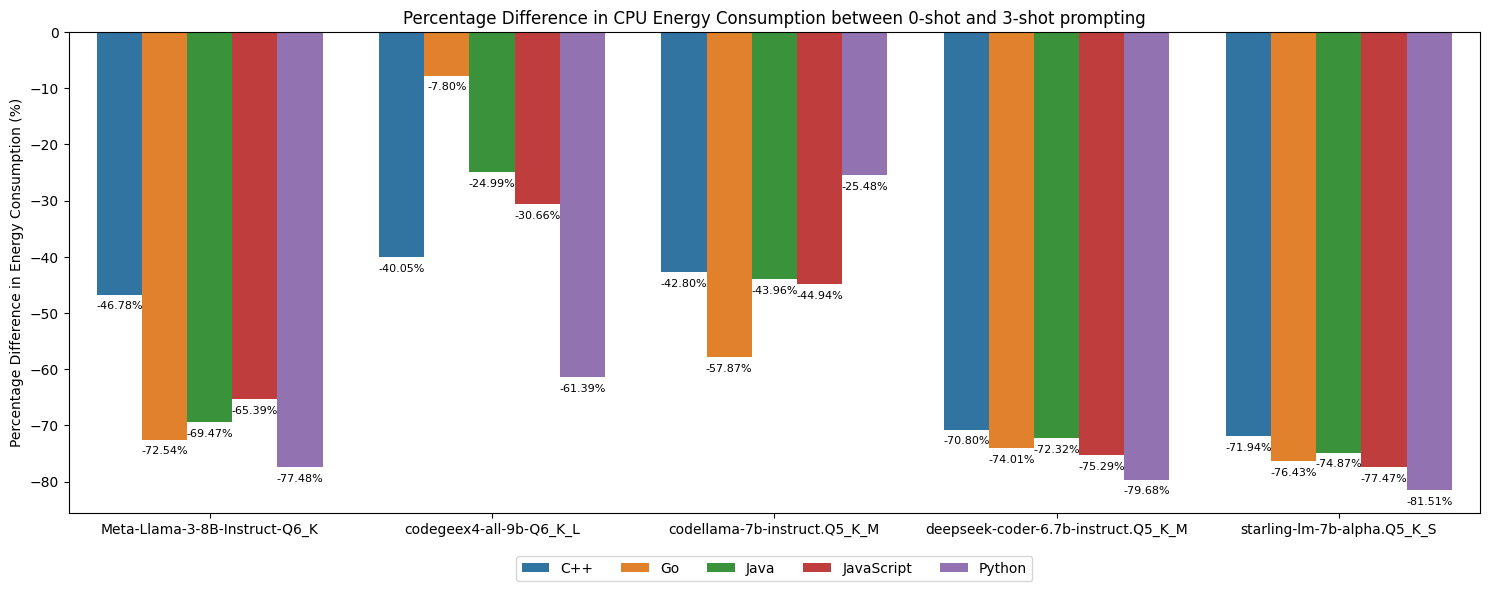

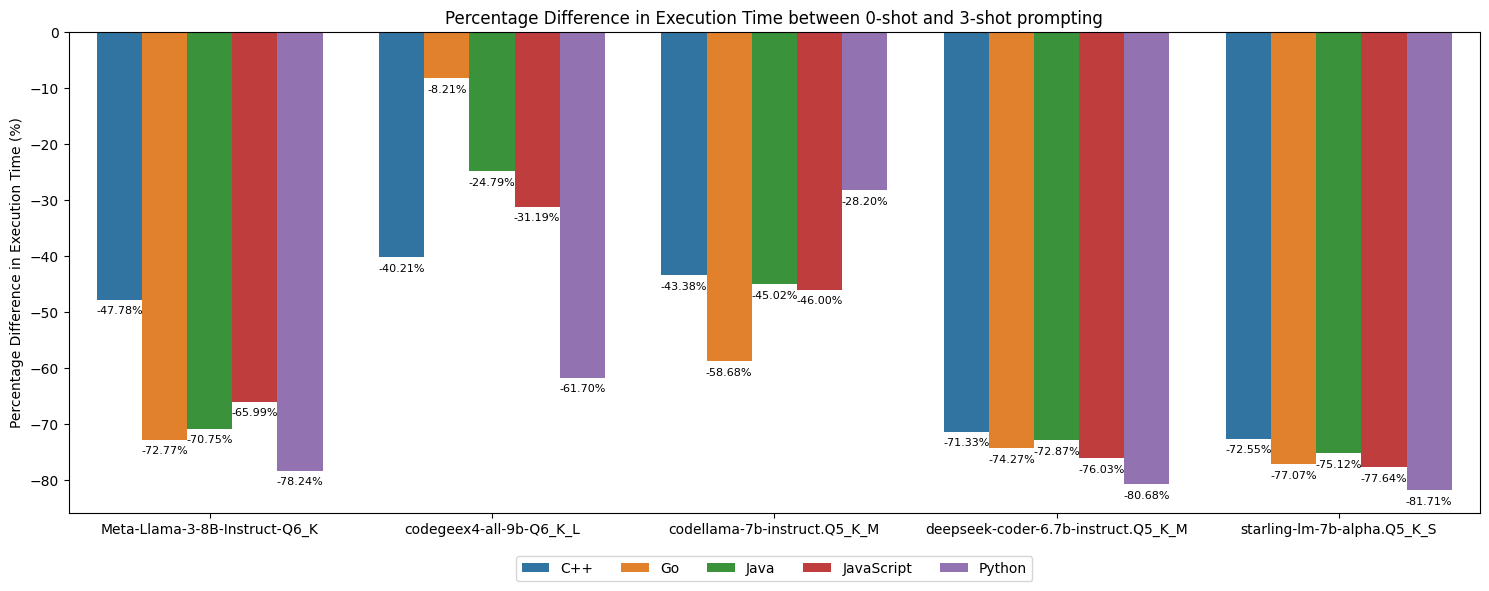

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the difference for CPU Energy and Execution Time
df_merged = pd.merge(df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     on=['LLM', 'Programming Language'],
                     suffixes=('_0', '_3'))

# Calculate the percentage difference
df_merged['CPU Energy Percentage Difference (%)'] = ((df_merged['CPU Energy (J)_3'] - df_merged['CPU Energy (J)_0']) / df_merged['CPU Energy (J)_0']) * 100
df_merged['Execution Time Percentage Difference (%)'] = ((df_merged['Execution time (s)_3'] - df_merged['Execution time (s)_0']) / df_merged['Execution time (s)_0']) * 100

# Create bar plots for CPU Energy Percentage Difference
plt.figure(figsize=(15, 6))
barplot_energy = sns.barplot(data=df_merged, x='LLM', y='CPU Energy Percentage Difference (%)', hue='Programming Language')
plt.title('Percentage Difference in CPU Energy Consumption between 0-shot and 3-shot prompting')
plt.xlabel('')
plt.ylabel('Percentage Difference in Energy Consumption (%)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels on top of each bar, positioned lower
for p in barplot_energy.patches:
    barplot_energy.annotate(f'{p.get_height():.2f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_height() - 2),  # Adjusting the position
                            ha='center', va='center', fontsize=8)

plt.grid(False)
plt.tight_layout()
plt.show()

# Create bar plots for Execution Time Percentage Difference
plt.figure(figsize=(15, 6))
barplot_time = sns.barplot(data=df_merged, x='LLM', y='Execution Time Percentage Difference (%)', hue='Programming Language')
plt.title('Percentage Difference in Execution Time between 0-shot and 3-shot prompting')
plt.xlabel('')
plt.ylabel('Percentage Difference in Execution Time (%)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels on top of each bar, positioned lower
for p in barplot_time.patches:
    barplot_time.annotate(f'{p.get_height():.2f}%', 
                          (p.get_x() + p.get_width() / 2., p.get_height() - 2),  # Adjusting the position
                          ha='center', va='center', fontsize=8)

plt.grid(False)
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

# Calculate the difference for CPU Energy and Execution Time
df_merged = pd.merge(df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     on=['LLM', 'Programming Language'],
                     suffixes=('_0', '_3'))

# Calculate the real differences
df_merged['CPU Energy Difference (J)'] = df_merged['CPU Energy (J)_3'] - df_merged['CPU Energy (J)_0']
df_merged['Execution Time Difference (s)'] = df_merged['Execution time (s)_3'] - df_merged['Execution time (s)_0']

# Calculate the percentage difference
df_merged['CPU Energy Percentage Difference (%)'] = ((df_merged['CPU Energy Difference (J)']) / df_merged['CPU Energy (J)_0']) * 100
df_merged['Execution Time Percentage Difference (%)'] = ((df_merged['Execution Time Difference (s)']) / df_merged['Execution time (s)_0']) * 100

# Select relevant columns for the final table
df_table = df_merged[['LLM', 'Programming Language', 
                      'CPU Energy Difference (J)', 'CPU Energy Percentage Difference (%)',
                      'Execution Time Difference (s)', 'Execution Time Percentage Difference (%)']]

# Display the table
df_table

,LLM,Programming Language,CPU Energy Difference (J),CPU Energy Percentage Difference (%),Execution Time Difference (s),Execution Time Percentage Difference (%)
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,-2195.632524,-46.778076,-34.405876,-47.775847
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,-3408.487410,-72.543258,-52.278192,-72.770986
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,-2755.930184,-69.472439,-43.039229,-70.750141
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,-2562.617940,-65.394344,-39.620774,-65.987898
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,-3767.993965,-77.476212,-58.360002,-78.241362
5,codegeex4-all-9b-Q6_K_L,C++,-2430.384594,-40.048695,-37.487935,-40.211920
6,codegeex4-all-9b-Q6_K_L,Go,-208.076310,-7.798734,-3.349717,-8.206267
7,codegeex4-all-9b-Q6_K_L,Java,-677.190551,-24.985027,-10.222334,-24.790774
8,codegeex4-all-9b-Q6_K_L,JavaScript,-622.584392,-30.657399,-9.683281,-31.189032
9,codegeex4-all-9b-Q6_K_L,Python,-1525.537616,-61.391378,-23.422363,-61.701648


In [32]:
df_0_averages_mean = df_0_averages.groupby('LLM', as_index=False).mean()
df_3_averages_mean = df_3_averages.groupby('LLM', as_index=False).mean()

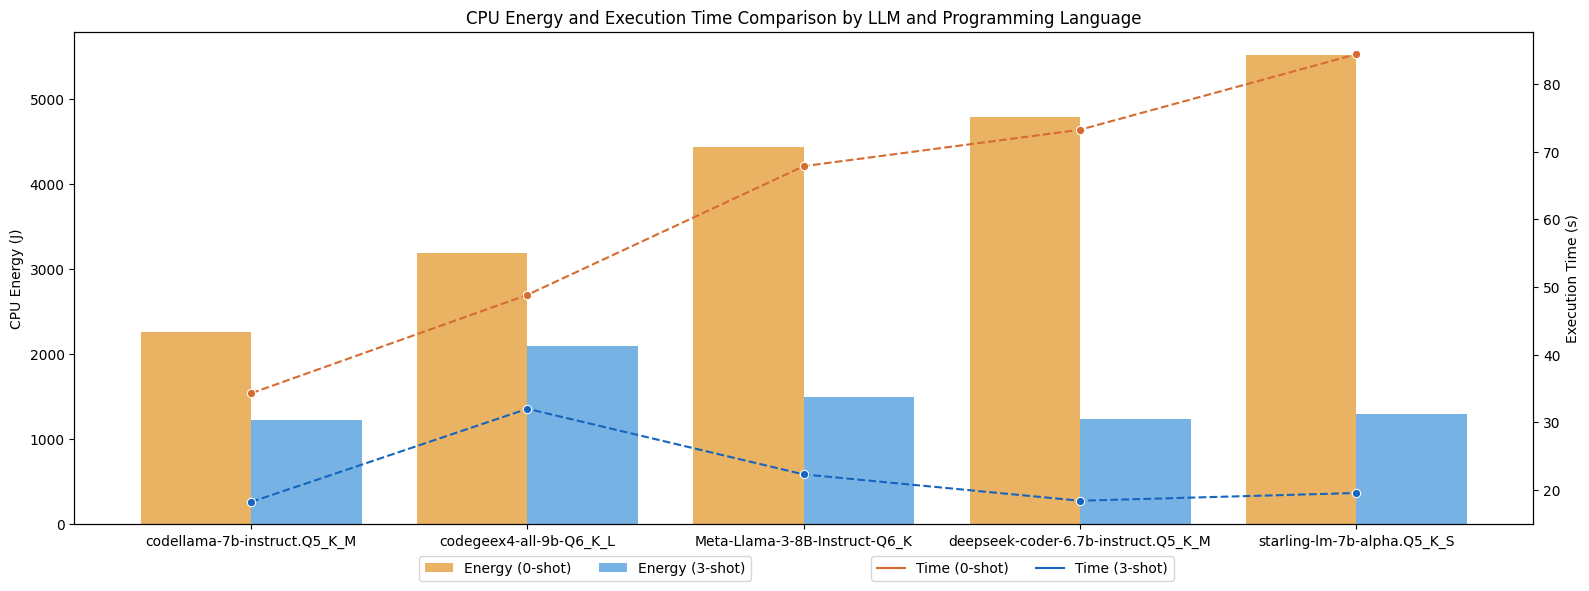

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_0_averages e df_3_averages já estão carregados

# Adicionar uma coluna para indicar o dataframe de origem
df_0_averages_mean['Source'] = '0-shot'
df_3_averages_mean['Source'] = '3-shot'

# Concatenar os DataFrames
merged_df = pd.concat([
    df_0_averages_mean[['LLM', 'CPU Energy (J)', 'Execution time (s)', 'Source']],
    df_3_averages_mean[['LLM', 'CPU Energy (J)', 'Execution time (s)', 'Source']]
], ignore_index=True)

# Calcular a média de Execution time (s) por LLM para ordenar
mean_execution_time = merged_df.groupby('LLM')['Execution time (s)'].mean()

# Ordenar os LLMs de acordo com o Execution time (s)
ordered_llms = mean_execution_time.sort_values().index

# Atualizar a ordem do eixo x de acordo com o tempo de execução
merged_df['LLM'] = pd.Categorical(merged_df['LLM'], categories=ordered_llms, ordered=True)

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(16, 6))

# Definir cores claras para as barras
bar_colors = ['#FFB74D', '#64B5F6']  # Laranja claro para '0-shot' e azul claro para '3-shot'

# Criar as barras para CPU Energy com cores claras
barplot = sns.barplot(data=merged_df, x='LLM', y='CPU Energy (J)', hue='Source', ax=ax1, palette=bar_colors)

# Remover o grid do eixo ax1 (barras)
ax1.grid(False)

# Adicionar títulos e rótulos
plt.title('CPU Energy and Execution Time Comparison by LLM and Programming Language')
ax1.set_xlabel('')
ax1.set_ylabel('CPU Energy (J)')

# Criar o segundo eixo y para Execution Time
ax2 = ax1.twinx()

# Definir cores escuras para as linhas
line_colors = ['#D76B30', '#1565C0']  # Laranja escuro para '0-shot' e azul escuro para '3-shot'

# Criar o lineplot para Execution Time
sns.lineplot(data=merged_df, x='LLM', y='Execution time (s)', hue='Source',
             marker='o', ax=ax2, palette=line_colors, linestyle='--')

# Remover o grid do eixo ax2 (linhas)
ax2.grid(False)

# Adicionar rótulos e título ao eixo y da direita
ax2.set_ylabel('Execution Time (s)')

# Obter handles e labels das legendas
handles1, labels1 = ax1.get_legend_handles_labels()  # Para o barplot
handles2, labels2 = ax2.get_legend_handles_labels()  # Para o lineplot

# Combinar handles e labels
handles = handles1 + handles2
labels = ['Energy (0-shot)', 'Energy (3-shot)', 'Time (0-shot)', 'Time (3-shot)']

# Adicionar legendas com as mesmas posições do seu exemplo
ax1.legend(handles1, ['Energy (0-shot)', 'Energy (3-shot)'], bbox_to_anchor=(0.35, -0.05), loc='upper center', ncol=2)
ax2.legend(handles2, ['Time (0-shot)', 'Time (3-shot)'], bbox_to_anchor=(0.65, -0.05), loc='upper center', ncol=2)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


#### Compare pass@k and BLEU scores

##### V1 - unused

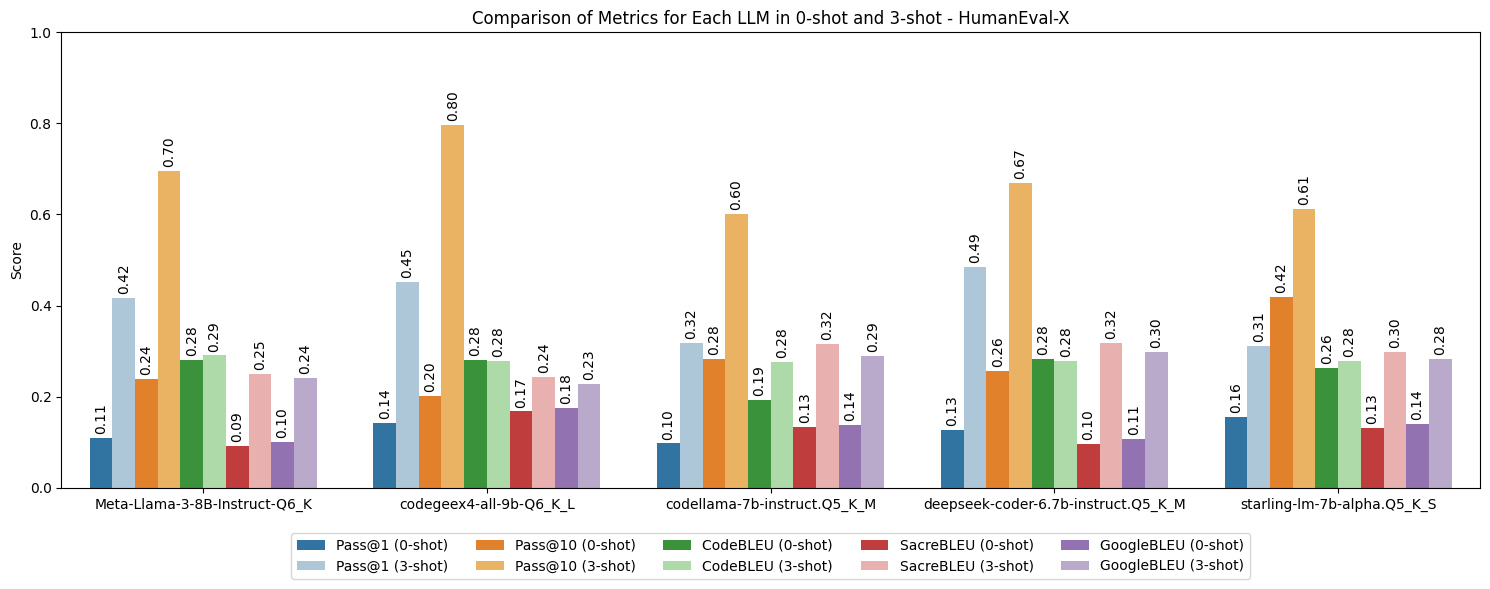

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames to an appropriate format
df_melted_0 = df_0_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10', 'CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')
df_melted_3 = df_3_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10', 'CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_melted_0['Shot'] = '0-shot'
df_melted_3['Shot'] = '3-shot'

# Combine the melted DataFrames
df_combined = pd.concat([df_melted_0, df_melted_3], ignore_index=True)

# Create a new column for combined Metric and Shot
df_combined['Metric_Shot'] = df_combined['Metric'] + " (" + df_combined['Shot'] + ")"

# Define the desired order
metric_order = [
    'Pass@1 (0-shot)',
    'Pass@1 (3-shot)',
    'Pass@10 (0-shot)',
    'Pass@10 (3-shot)',
    'CodeBLEU (0-shot)',
    'CodeBLEU (3-shot)',
    'SacreBLEU (0-shot)',
    'SacreBLEU (3-shot)',
    'GoogleBLEU (0-shot)',
    'GoogleBLEU (3-shot)'
]

# Create a custom order for the Metric_Shot column
df_combined['Metric_Shot'] = pd.Categorical(df_combined['Metric_Shot'], categories=metric_order, ordered=True)

# Define a custom palette with lighter shades for 3-shot metrics
palette = {
    'Pass@1 (0-shot)': '#1f77b4',  # Dark blue for 0-shot
    'Pass@1 (3-shot)': '#a6c8e0',  # Light blue for 3-shot
    'Pass@10 (0-shot)': '#ff7f0e',  # Dark orange for 0-shot
    'Pass@10 (3-shot)': '#ffb84d',  # Light orange for 3-shot
    'CodeBLEU (0-shot)': '#2ca02c',  # Dark green for 0-shot
    'CodeBLEU (3-shot)': '#a8e1a1',  # Light green for 3-shot
    'SacreBLEU (0-shot)': '#d62728',  # Dark red for 0-shot
    'SacreBLEU (3-shot)': '#f2a6a6',  # Light red for 3-shot
    'GoogleBLEU (0-shot)': '#9467bd',  # Dark purple for 0-shot
    'GoogleBLEU (3-shot)': '#b9a3d1'   # Light purple for 3-shot
}

# Plot settings for combined data
plt.figure(figsize=(15, 6))
bar_plot = sns.barplot(data=df_combined, x='LLM', y='Score', hue='Metric_Shot', ci=None, palette=palette, dodge=True)

plt.title("Comparison of Metrics for Each LLM in 0-shot and 3-shot - HumanEval-X")
plt.xlabel("")
plt.ylabel("Score")
plt.ylim(0, 1)

# Place the legend below the plot and centered
plt.legend(title=None, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=5)

# Add labels to the bars and rotate them 90 degrees
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),  # Format the height to 2 decimal places
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of each bar
                      ha='center', va='baseline',  # Align the text at the center of the bar
                      fontsize=10, color='black',  # Set font size and color
                      xytext=(0, 5),  # Offset the text slightly above the bar
                      textcoords='offset points')  # Use offset points for positioning

# Rotate the labels 90 degrees
for label in bar_plot.texts:
    label.set_rotation(90)

plt.grid(False)
plt.tight_layout()
plt.show()


##### V2 - used

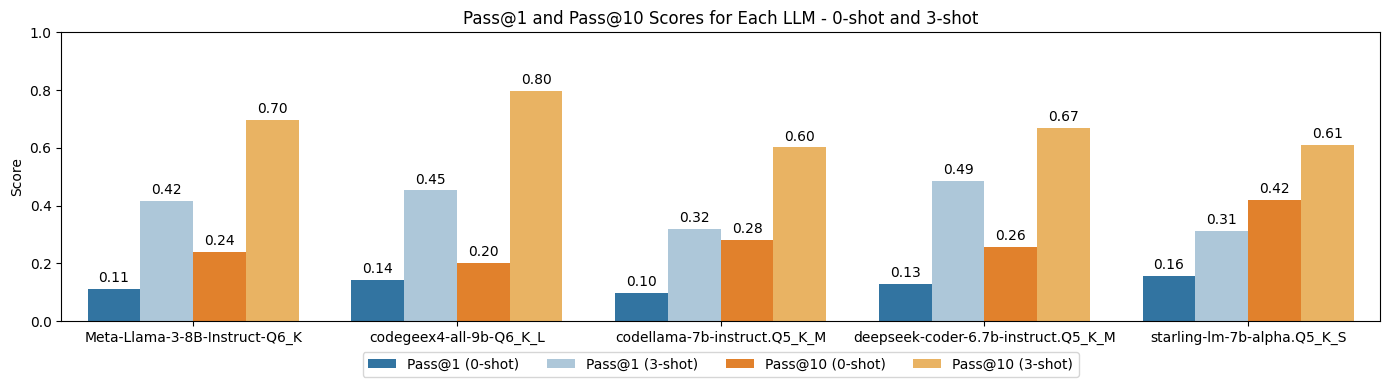

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames to the appropriate format for Pass@1 and Pass@10
df_melted_0 = df_0_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10'], var_name='Metric', value_name='Score')
df_melted_3 = df_3_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10'], var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_melted_0['Shot'] = '0-shot'
df_melted_3['Shot'] = '3-shot'

# Combine the melted DataFrames for barplot
df_combined = pd.concat([df_melted_0, df_melted_3], ignore_index=True)

# Create a new column for combined Metric and Shot for custom order
df_combined['Metric_Shot'] = df_combined['Metric'] + " (" + df_combined['Shot'] + ")"

# Define the desired order for bar plot
metric_order = [
    'Pass@1 (0-shot)', 'Pass@1 (3-shot)',
    'Pass@10 (0-shot)', 'Pass@10 (3-shot)'
]

# Create a custom order for the Metric_Shot column
df_combined['Metric_Shot'] = pd.Categorical(df_combined['Metric_Shot'], categories=metric_order, ordered=True)

# Define a custom palette with lighter shades for 3-shot metrics
palette = {
    'Pass@1 (0-shot)': '#1f77b4',  # Dark blue for 0-shot
    'Pass@1 (3-shot)': '#a6c8e0',  # Light blue for 3-shot
    'Pass@10 (0-shot)': '#ff7f0e',  # Dark orange for 0-shot
    'Pass@10 (3-shot)': '#ffb84d'   # Light orange for 3-shot
}

# Plot settings for barplot
plt.figure(figsize=(14, 4))
bar_plot = sns.barplot(data=df_combined, x='LLM', y='Score', hue='Metric_Shot', ci=None, palette=palette, dodge=True)

plt.title("Pass@1 and Pass@10 Scores for Each LLM - 0-shot and 3-shot")
plt.xlabel("")
plt.ylabel("Score")
plt.ylim(0, 1)

# Place the legend below the plot and centered
plt.legend(title=None, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=4)

# Add labels to the bars and rotate them 90 degrees
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),  # Format the height to 2 decimal places
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of each bar
                      ha='center', va='baseline',  # Align the text at the center of the bar
                      fontsize=10, color='black',  # Set font size and color
                      xytext=(0, 5),  # Offset the text slightly above the bar
                      textcoords='offset points')  # Use offset points for positioning


plt.grid(False)
plt.tight_layout()
plt.show()


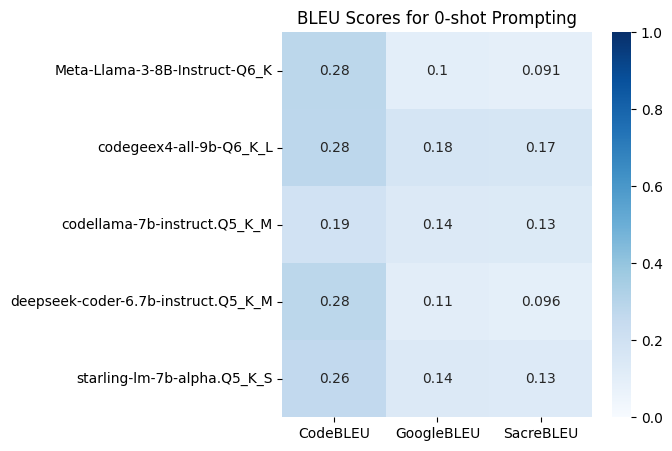

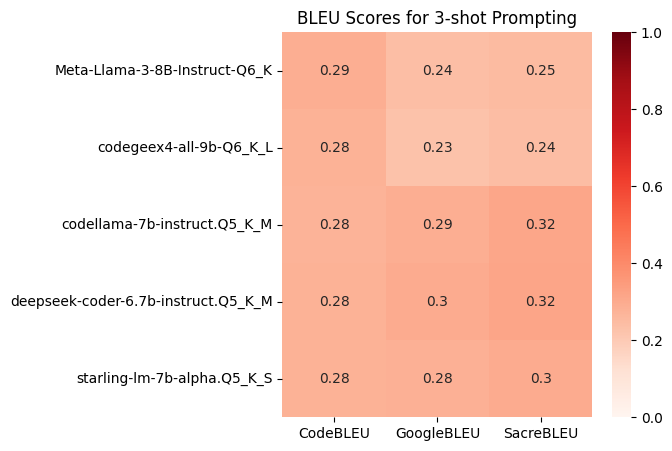

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames for BLEU scores (CodeBLEU, SacreBLEU, GoogleBLEU) for heatmaps
df_bleu_melted_0 = df_0_averages.melt(id_vars=['LLM'], value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')
df_bleu_melted_3 = df_3_averages.melt(id_vars=['LLM'], value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_bleu_melted_0['Shot'] = '0-shot'
df_bleu_melted_3['Shot'] = '3-shot'

# Combine melted DataFrames for heatmaps
df_bleu_combined = pd.concat([df_bleu_melted_0, df_bleu_melted_3], ignore_index=True)

# Group by LLM and Metric to resolve duplicate entries by averaging them
df_bleu_combined = df_bleu_combined.groupby(['LLM', 'Metric', 'Shot']).mean().reset_index()

# Create a pivot table to generate heatmaps for each shot type
heatmap_data_0 = df_bleu_combined[df_bleu_combined['Shot'] == '0-shot'].pivot("LLM", "Metric", "Score")
heatmap_data_3 = df_bleu_combined[df_bleu_combined['Shot'] == '3-shot'].pivot("LLM", "Metric", "Score")

height = 5
width = 5

# Create heatmap for 0-shot BLEU scores
plt.figure(figsize=(height, width))
sns.heatmap(heatmap_data_0, annot=True, cmap='Blues', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
plt.title("BLEU Scores for 0-shot Prompting")
plt.show()

# Create heatmap for 3-shot BLEU scores
plt.figure(figsize=(height, width))
sns.heatmap(heatmap_data_3, annot=True, cmap='Reds', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
plt.title("BLEU Scores for 3-shot Prompting")
plt.show()
